In [1]:
import numpy as np
import pickle

# 加载数据
with open('R_ET_1_ET_2_ET_3_0.pkl', 'rb') as file:
    data = pickle.load(file)

In [2]:
# 提取协方差矩阵
cov_matrix_1 = data[1]  # 直接使用 data[1] 作为第一个协方差矩阵
cov_matrix_2 = data[2][0]  # data[2] 是一个包含两个 9x9 矩阵的三维数组
cov_matrix_3 = data[2][1]  # 提取第二个 9x9 矩阵

# 打印每个矩阵的形状以验证
print("Shape of cov_matrix_1:", cov_matrix_1.shape)
print("Shape of cov_matrix_2:", cov_matrix_2.shape)
print("Shape of cov_matrix_3:", cov_matrix_3.shape)


Shape of cov_matrix_1: (9, 9)
Shape of cov_matrix_2: (9, 9)
Shape of cov_matrix_3: (9, 9)


In [3]:
def kl_divergence(cov1, cov2):
    """
    计算两个多元高斯分布之间的KL散度
    """
    # 正则化防止不可逆情况
    cov2 += np.eye(cov2.shape[0]) * 1e-10
    
    inv_cov2 = np.linalg.inv(cov2)
    term1 = np.trace(inv_cov2 @ cov1)
    term2 = np.log(np.linalg.det(cov2) / np.linalg.det(cov1))
    k = cov1.shape[0]  # 矩阵的维度
    return 0.5 * (term1 + term2 - k)

# 计算并输出每两个矩阵之间的KL散度
kl_12 = kl_divergence(cov_matrix_1, cov_matrix_2)
kl_13 = kl_divergence(cov_matrix_1, cov_matrix_3)
kl_23 = kl_divergence(cov_matrix_2, cov_matrix_3)

print(f"KL Divergence between matrix 1 and matrix 2: {kl_12}")
print(f"KL Divergence between matrix 1 and matrix 3: {kl_13}")
print(f"KL Divergence between matrix 2 and matrix 3: {kl_23}")

KL Divergence between matrix 1 and matrix 2: 2475460236159.1973
KL Divergence between matrix 1 and matrix 3: 5.292655202993046e-11
KL Divergence between matrix 2 and matrix 3: 40.27238080442277


In [4]:
def check_matrix_properties(matrix):
    eigvals = np.linalg.eigvals(matrix)
    print(f"Eigenvalues of matrix:\n{eigvals}")
    print(f"Matrix is positive definite: {np.all(eigvals > 0)}")

check_matrix_properties(cov_matrix_1)
check_matrix_properties(cov_matrix_2)
check_matrix_properties(cov_matrix_3)

Eigenvalues of matrix:
[5.54883037e+13 7.45020720e+10 2.47787916e+09 2.51884790e+06
 6.27368445e+05 1.52860949e+05 1.12480808e+00 6.96705381e+02
 3.66723461e+02]
Matrix is positive definite: True
Eigenvalues of matrix:
[ 4.35817983e+13  1.31671512e+08  4.62886361e+05  1.18491117e+05
  1.12816498e+05  2.85227222e+04  2.53960011e-04  9.68205793e-07
 -5.50115766e-09]
Matrix is positive definite: False
Eigenvalues of matrix:
[5.54883037e+13 7.45020720e+10 2.47787916e+09 2.51884790e+06
 6.27368445e+05 1.52860949e+05 1.12480808e+00 6.96705381e+02
 3.66723461e+02]
Matrix is positive definite: True


In [5]:
def make_positive_definite(matrix, epsilon=1e-6):
    """ 确保矩阵是正定的 """
    eigvals, eigvecs = np.linalg.eigh(matrix)
    eigvals = np.clip(eigvals, epsilon, None)  # 将小于 epsilon 的特征值设置为 epsilon
    return eigvecs @ np.diag(eigvals) @ eigvecs.T

cov_matrix_2_corrected = make_positive_definite(cov_matrix_2)

In [6]:
kl_12_corrected = kl_divergence(cov_matrix_1, cov_matrix_2_corrected)
kl_23_corrected = kl_divergence(cov_matrix_2_corrected, cov_matrix_3)

print(f"KL Divergence between matrix 1 and corrected matrix 2: {kl_12_corrected}")
print(f"KL Divergence between corrected matrix 2 and matrix 3: {kl_23_corrected}")

KL Divergence between matrix 1 and corrected matrix 2: 126421928.85497607
KL Divergence between corrected matrix 2 and matrix 3: 24.534753937784245


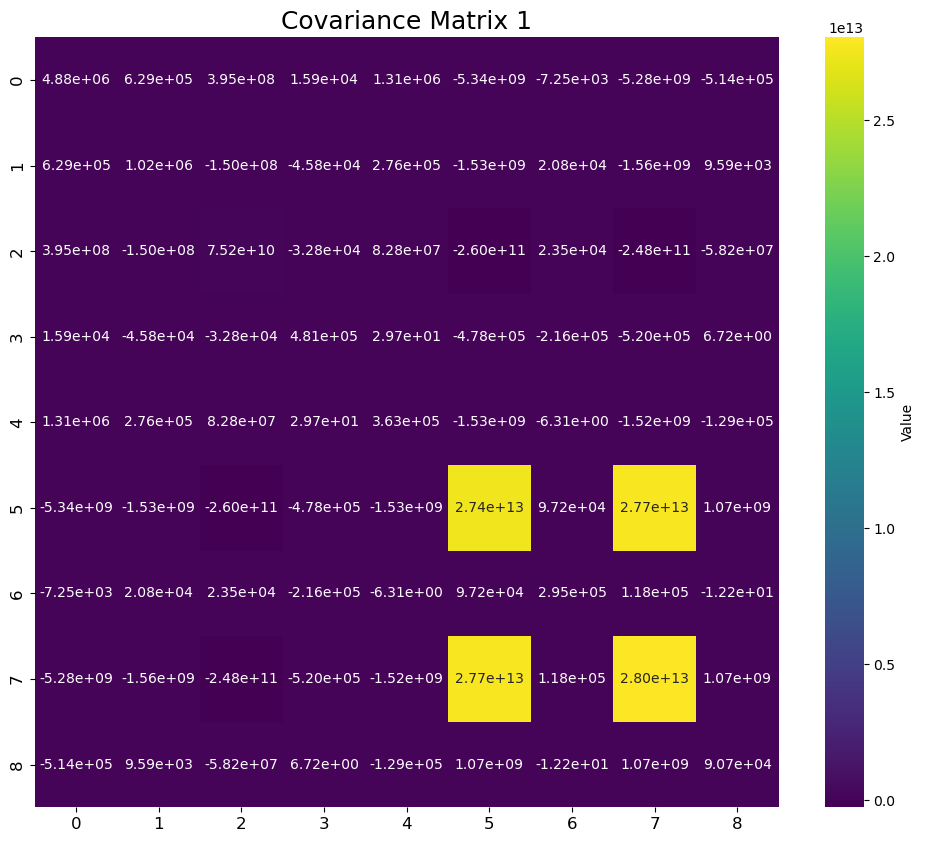

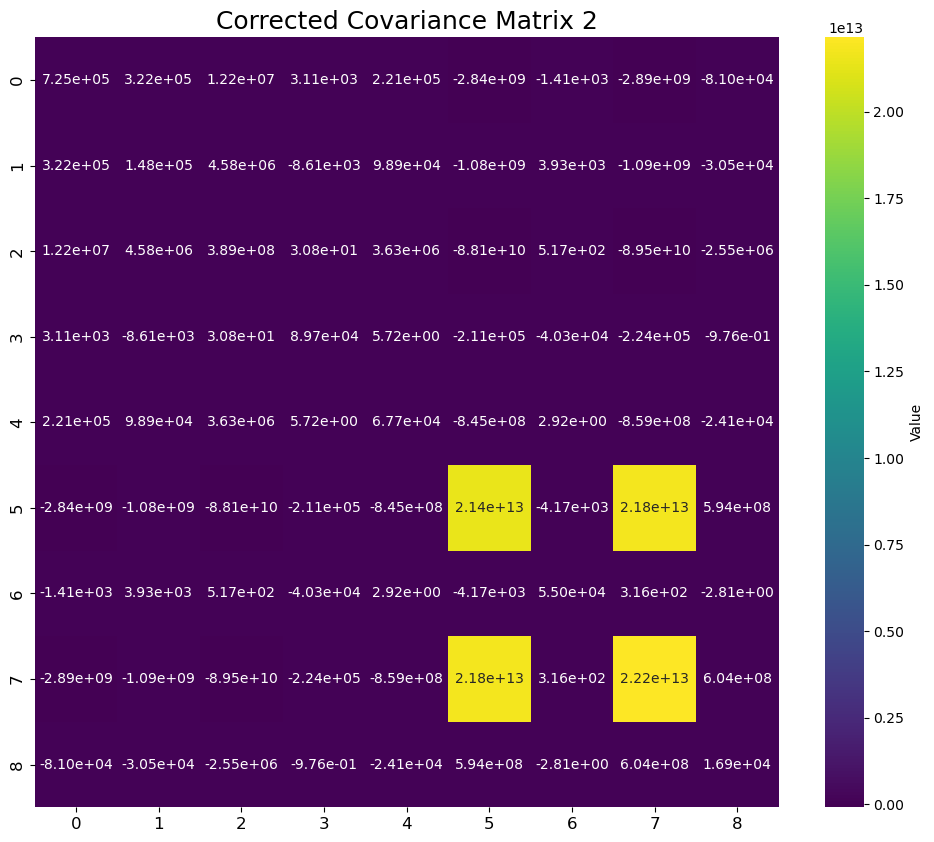

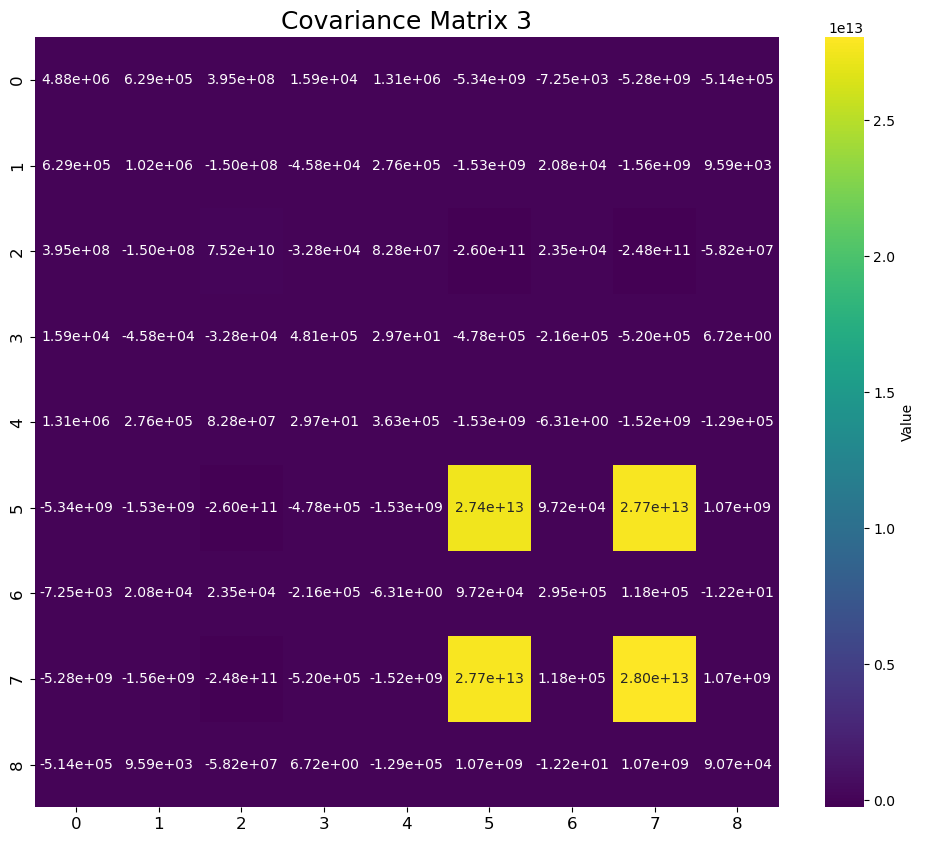

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_matrix(matrix, title):
    plt.figure(figsize=(12, 10))  # 增加图形的大小
    sns.heatmap(matrix, annot=True, fmt='.2e', cmap='viridis', annot_kws={"size": 10}, cbar_kws={'label': 'Value'})
    plt.title(title, fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

plot_matrix(cov_matrix_1, "Covariance Matrix 1")
plot_matrix(cov_matrix_2_corrected, "Corrected Covariance Matrix 2")
plot_matrix(cov_matrix_3, "Covariance Matrix 3")